<a href="https://colab.research.google.com/github/ThePNS-63/first-project/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.describe()
data.columns
data.head(5)
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


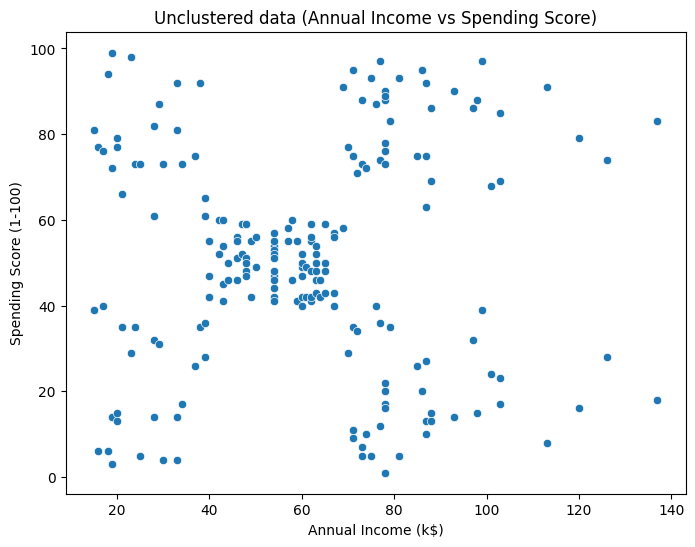

In [5]:
plt.figure(figsize=(8,6))
plt.title('Unclustered data (Annual Income vs Spending Score)')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.show()

In [6]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
from sklearn.cluster import KMeans

In [8]:
#Elbow Method
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

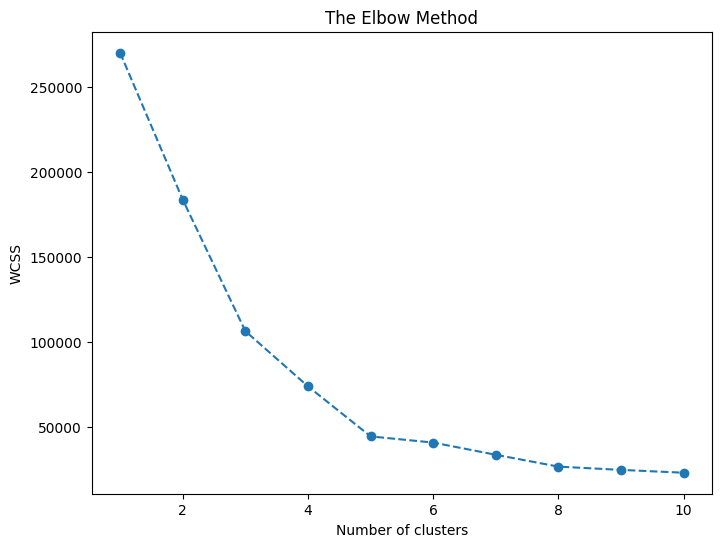

In [9]:
#plotting the elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

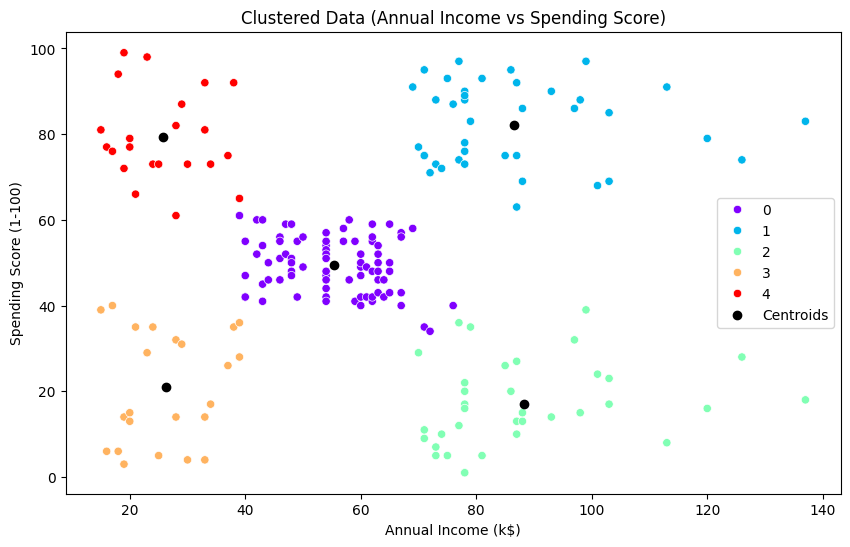

In [13]:
plt.figure(figsize=(10,6))
plt.title('Clustered Data (Annual Income vs Spending Score)')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,hue='cluster',palette='rainbow')
centroids = kmeans.cluster_centers_
plt.scatter(x=centroids[:,0],y=centroids[:,1],c='black',label='Centroids')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X,kmeans.labels_)
print('Silhouette Score:',silhouette) # print(f'Silhouette Score: {silhouette}') this in jupyter notebook

Silhouette Score: 0.553931997444648


In [15]:
cluster_range = range(2,10)
silhouette_scores = []

In [16]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,random_state=30)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X,labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters={n_clusters}, the silhouette score is {silhouette_avg}')

For n_clusters=2, the silhouette score is 0.3774913479961559
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.41508307009338524
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5375812731362782
For n_clusters=7, the silhouette score is 0.45611379440879946
For n_clusters=8, the silhouette score is 0.42171151217040276
For n_clusters=9, the silhouette score is 0.4242794142604815


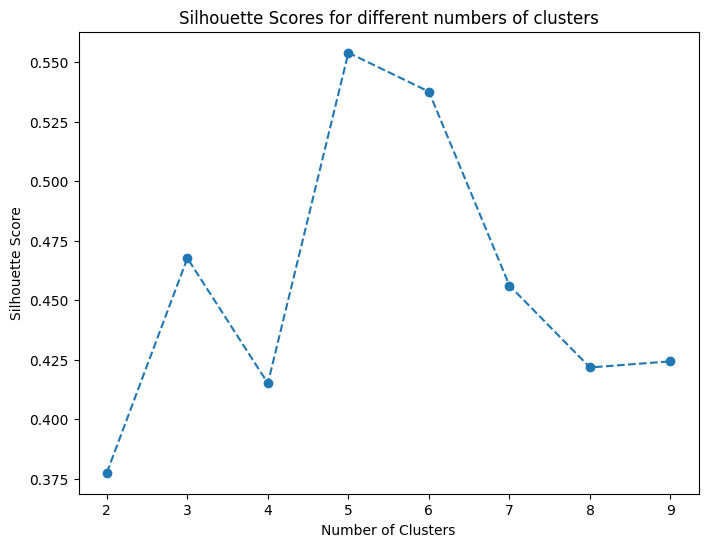

In [18]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range,silhouette_scores,marker='o',linestyle='--')
plt.title('Silhouette Scores for different numbers of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

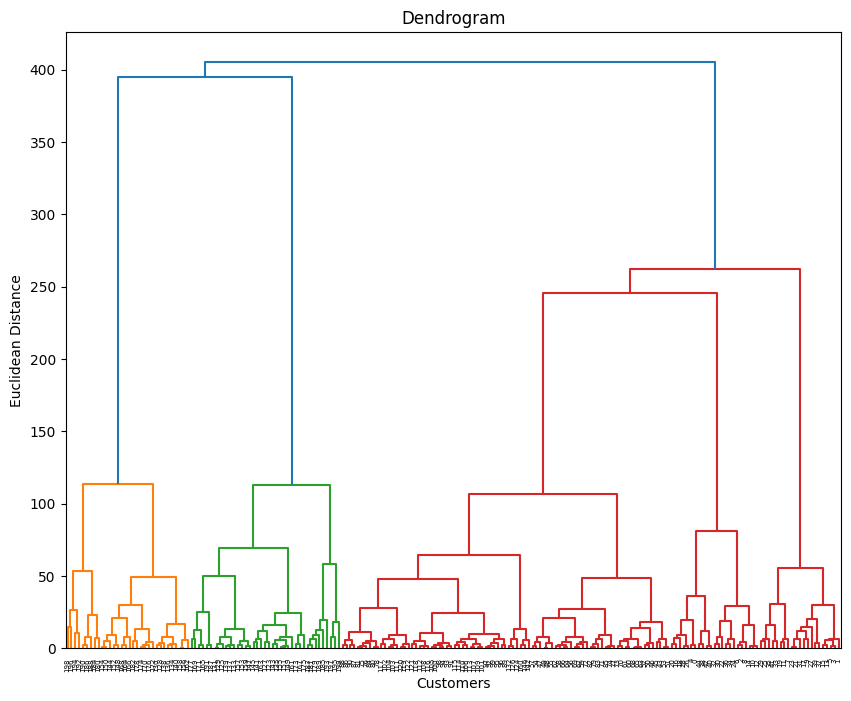

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
plt.figure(figsize=(10,8))
linked = linkage(X,method='ward')
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()